<a href="https://colab.research.google.com/github/JR-1991/Catalax/blob/master/examples/SurrogateHMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install catalax
!pip install catalax

In [1]:
import json
import numpyro

import catalax as ctx
import catalax.neural as ctn
import catalax.mcmc as cmc
import jax.numpy as jnp

numpyro.set_host_device_count(5)

In [2]:
# Load model
model = ctx.Model.load("./models/menten_model_w_priors.json")

# Load data
data = jnp.load("./data/data.npy")
time = jnp.load("./data/time.npy")
initial_conditions = json.load(open("./data/initial_conditions.json", "r"))

# Load neural ODE
neuralode = ctn.NeuralODE.from_eqx("./trained/menten_trained.eqx")


In [3]:
# First, lets repeat the analysis of MCMC.ipynb
mcmc, bayes_model = cmc.run_mcmc(
    model=model,
    data=data,
    initial_conditions=initial_conditions,
    times=time,
    yerrs=2.0,
    num_warmup=1000,
    num_samples=1000,
    dt0=0.1,
    max_steps=64**4
)

🔸 Priors
├── v_max: U(low=1e-06, high=200.0)
├── K_m: U(low=1e-06, high=1000.0)

🚀 Running MCMC



sample: 100%|██████████| 2000/2000 [02:58<00:00, 11.21it/s, 15 steps of size 1.89e-01. acc. prob=0.93]




🎉 Finished

                mean       std    median      5.0%     95.0%     n_eff     r_hat
       K_m     98.99      0.62     99.01     97.94     99.99    463.36      1.00
     sigma      0.95      0.03      0.95      0.90      0.99    385.90      1.00
     v_max      6.97      0.02      6.97      6.94      7.00    458.55      1.00

Number of divergences: 0


/Users/jara1991/sysbiojax/catalax/mcmc/plotting.py:99: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


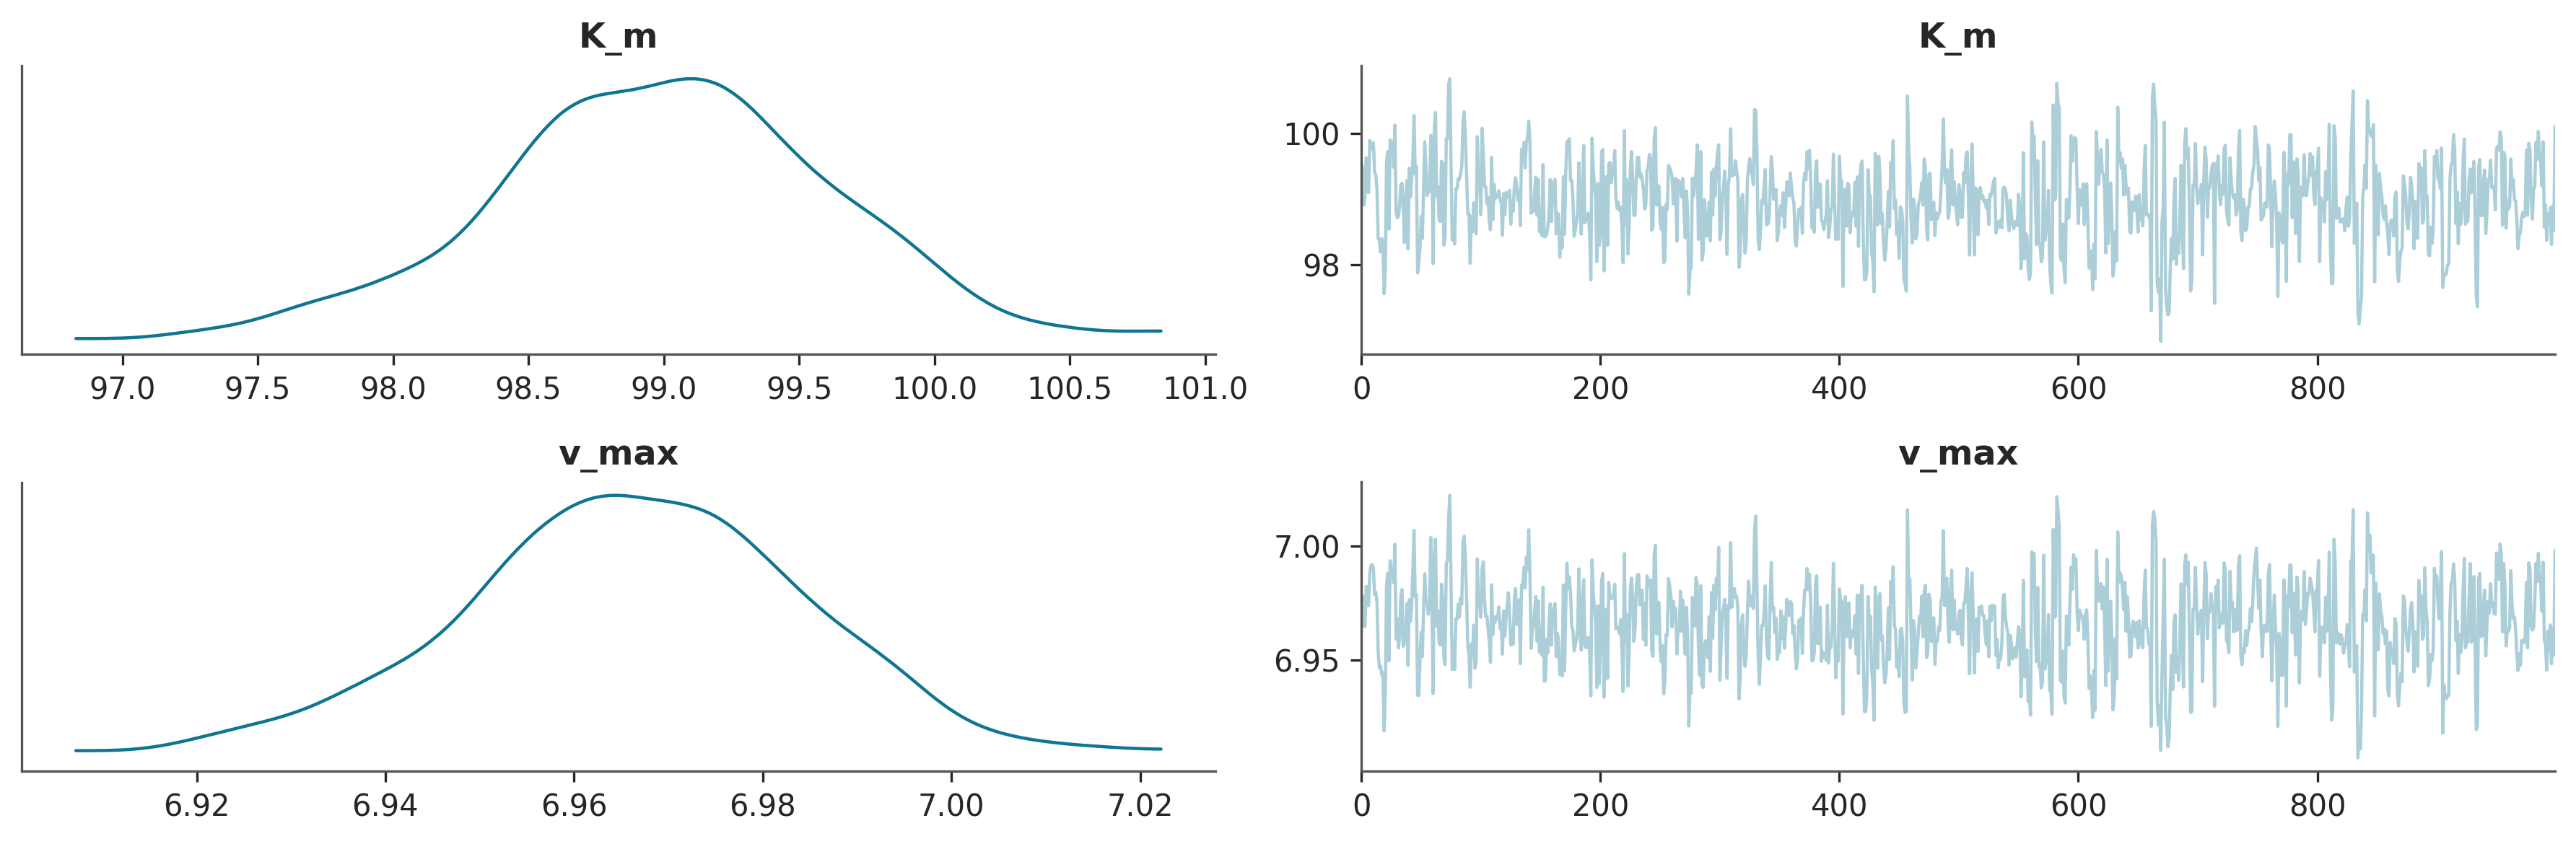

In [4]:
# Plot the posterior distributions
f = cmc.plot_trace(mcmc, model)

In [5]:
# Next, simply pass the neural ODE and the surrogate HMC will be used
mcmc, bayes_model = cmc.run_mcmc(
    model=model,
    neuralode=neuralode,
    data=data,
    initial_conditions=initial_conditions,
    times=time,
    yerrs=2.0,
    num_warmup=1000,
    num_samples=1000,
    dt0=0.1,
    max_steps=64**4
)

🔸 Priors
├── v_max: U(low=1e-06, high=200.0)
├── K_m: U(low=1e-06, high=1000.0)

🚀 Running MCMC



sample: 100%|██████████| 2000/2000 [00:01<00:00, 1597.05it/s, 7 steps of size 3.04e-01. acc. prob=0.93]



🎉 Finished

                mean       std    median      5.0%     95.0%     n_eff     r_hat
       K_m    100.67      0.80    100.66     99.28    101.86    318.57      1.00
     sigma      0.06      0.00      0.06      0.06      0.07    742.86      1.00
     v_max      7.10      0.03      7.10      7.05      7.14    389.76      1.00

Number of divergences: 0


/Users/jara1991/sysbiojax/catalax/mcmc/plotting.py:99: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


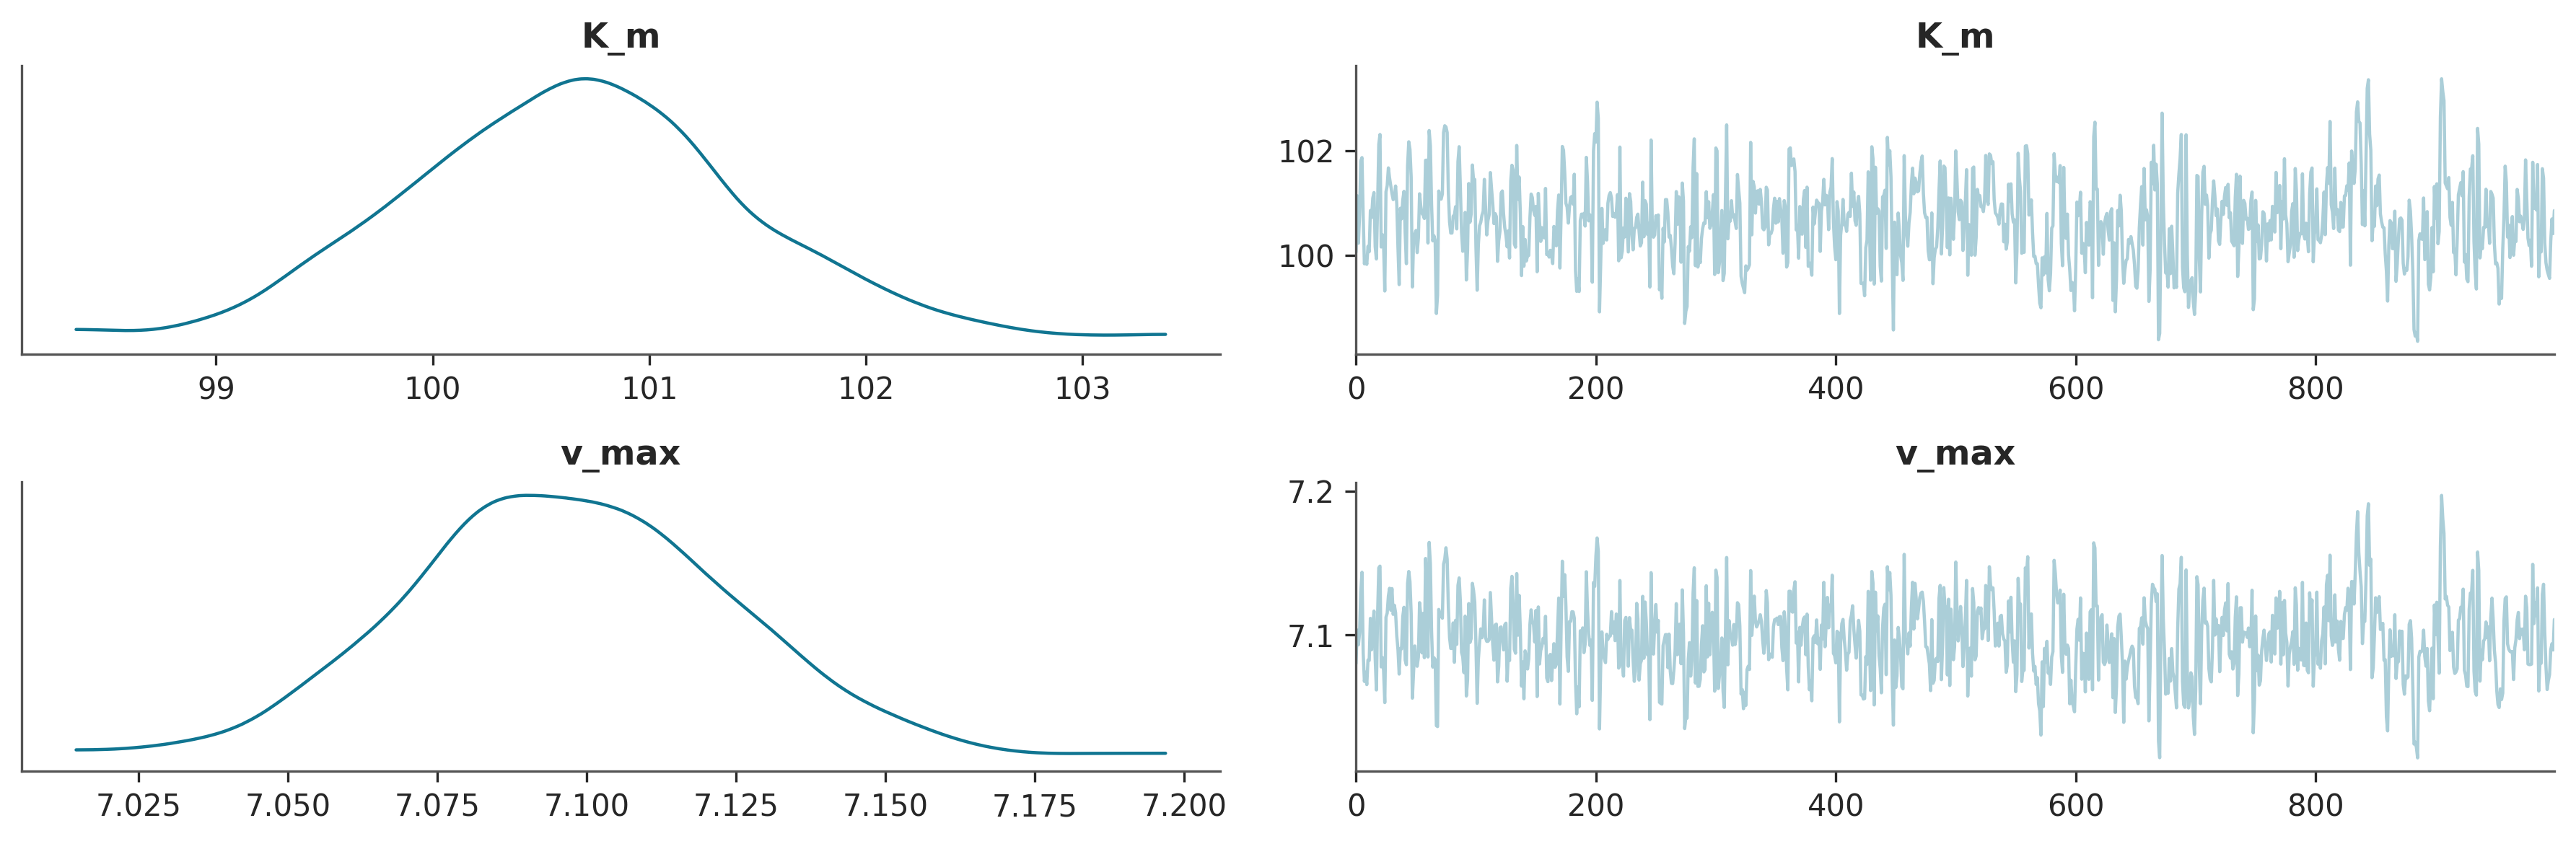

In [6]:
# Plot the posterior distributions
f = cmc.plot_trace(mcmc, model)

In [7]:
# Lets scale this up to a bigger amount of samples
# and add more chains on top of that
#
# If you are previewing from GitHub, the progress bars appear
# to be stuck at 0% but the code has been run and oin total
# took 17s on my machine (Try it yourself, to verify!)

mcmc, bayes_model = cmc.run_mcmc(
    model=model,
    neuralode=neuralode,
    data=data,
    initial_conditions=initial_conditions,
    times=time,
    yerrs=2.0,
    num_warmup=10_000,
    num_samples=1_000_000,
    chain_method="parallel",
    num_chains=5,
    dt0=0.1,
    max_steps=64**4
)

🔸 Priors
├── v_max: U(low=1e-06, high=200.0)
├── K_m: U(low=1e-06, high=1000.0)

🚀 Running MCMC



  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]



🎉 Finished

                mean       std    median      5.0%     95.0%     n_eff     r_hat
       K_m    100.66      0.75    100.65     99.43    101.88 3786577.41      1.00
     sigma      0.06      0.00      0.06      0.06      0.07 4746637.95      1.00
     v_max      7.10      0.03      7.10      7.05      7.14 3882846.77      1.00

Number of divergences: 0
